In [172]:
import numpy as np
import pandas as pd
x = np.genfromtxt('../data/travel_list_reduced.csv', delimiter=",", names = True, dtype = None, encoding = 'utf-8')
x = x.view(np.recarray)
x.dtype
two_ways = np.loadtxt('../data/two_ways.txt') ### I SAVED THIS RIGHT AFTER IT WAS MADE IN THE OTHER NOTEBOOK 
# -- I ASSUME THE INDEXES ARE THE SAME AS X

emissionsgt2inds = np.where(two_ways>=2)[0]
x_emissionsgt2 = x[emissionsgt2inds]
x_emissionsgt2_pd = pd.DataFrame(x_emissionsgt2)

# print(np.unique(x.Reislaenge))
# ['' 'Europe' 'Germany' 'Local' 'Overseas']
# print(np.unique(x.Reisezweck))
# ['' ' Other' 'Collaboration' 'Comissioning' 'Conference' 'Observation'
#  'Other']

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

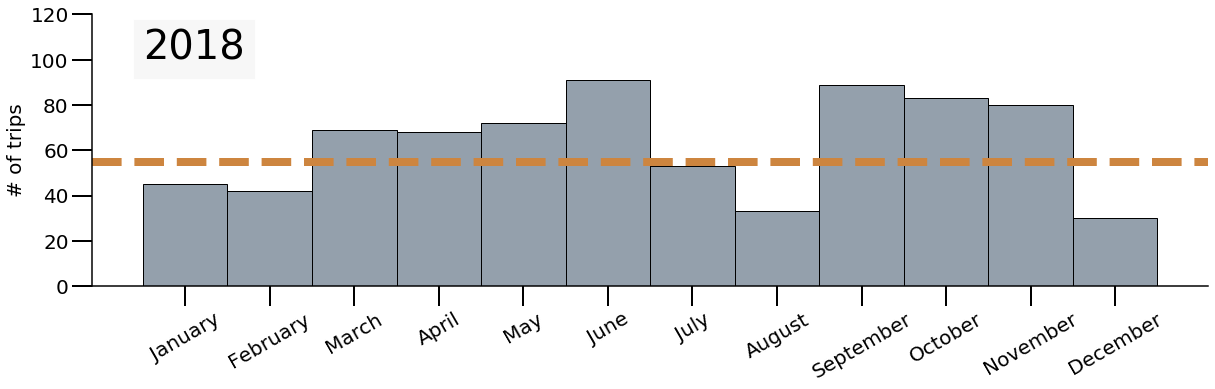

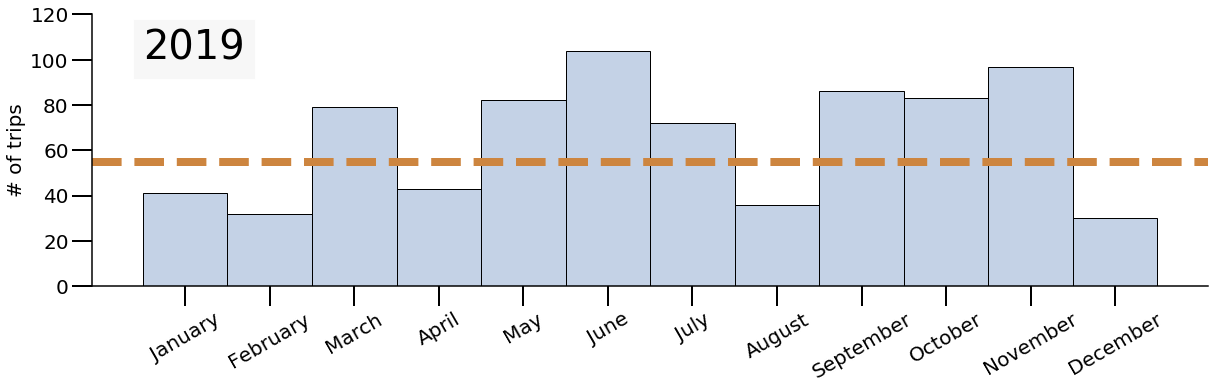

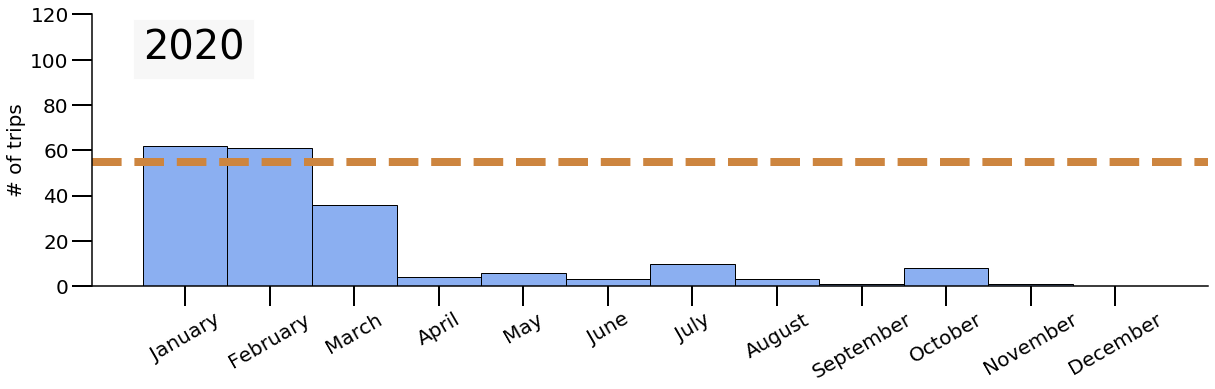

In [173]:
##### HISTOGRAMS OF FLIGHTS AS A FUNCTION OF MONTH
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os.path
import sys
import geopandas
from geopy.geocoders import Nominatim

months = np.unique(x.month)
months = [1,2,3,4,5,6,7,8,9,10,11,12,13]

f, ax = plt.subplots(figsize=(20, 5))
sns.despine(f)
sns.histplot(x.month[np.where(x.year==2018)[0]],
            bins=months,
            color='slategray')
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.text(1,100,'2018',fontsize=40,bbox=dict(facecolor='whitesmoke', edgecolor='white', pad=10,alpha=0.8))
ax.axhline(y=55,lw=8,linestyle='dashed',color='peru')
ax.set_xticks([i+0.5 for i in months[:-1]])
ax.set_ylim([0,120])
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_ylabel('# of trips',fontsize=20)
ax.set_xticklabels(['January','February', 'March', 'April','May','June','July','August','September','October','November', 'December'],\
                  rotation=30, fontsize=20)

f, ax = plt.subplots(figsize=(20, 5))
sns.despine(f)
sns.histplot(x.month[np.where(x.year==2019)[0]],
            bins=months,
            color='lightsteelblue')
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.text(1,100,'2019',fontsize=40,bbox=dict(facecolor='whitesmoke', edgecolor='white', pad=10,alpha=0.8))
ax.axhline(y=55,lw=8,linestyle='dashed',color='peru')
ax.set_xticks([i+0.5 for i in months[:-1]])
ax.set_ylim([0,120])
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_ylabel('# of trips',fontsize=20)
ax.set_xticklabels(['January','February', 'March', 'April','May','June','July','August','September','October','November', 'December'],\
                  rotation=30, fontsize=20)

f, ax = plt.subplots(figsize=(20, 5))
sns.despine(f)
sns.histplot(x.month[np.where(x.year==2020)[0]],
            bins=months,
            color='cornflowerblue')
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.text(1,100,'2020',fontsize=40,bbox=dict(facecolor='whitesmoke', edgecolor='white', pad=10,alpha=0.8))
ax.axhline(y=55,lw=8,linestyle='dashed',color='peru')
ax.set_xticks([i+0.5 for i in months[:-1]])
ax.set_ylim([0,120])
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_ylabel('# of trips',fontsize=20)
ax.set_xticklabels(['January','February', 'March', 'April','May','June','July','August','September','October','November', 'December'],\
                  rotation=30, fontsize=20)

In [ ]:
#### DUMMY PLOTS TO JUST VISUALIZE:
### CO2 vs duration (with various flavors)
### histogram of CO2 for durations < 3d
### histogram of CO2 for durations [3,7) d
### histogram of duration for overseas trips

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os.path
import sys
import geopandas
from geopy.geocoders import Nominatim
import pandas as pd

plt.scatter(x.Reisedauer,two_ways)
plt.xlabel('Reisedauer')
plt.ylabel('CO2')
plt.xlim([0,20])
plt.show()
# arr > 0.1) & (arr < 1)

plt.hist(two_ways[np.where(x.Reisedauer<3)[0]],bins=np.linspace(0,6,60))
plt.title('Constraint: Reisedauer < 3d')
plt.xlabel('CO2')
plt.ylabel('Count')
plt.show()
plt.hist(two_ways[np.where((x.Reisedauer>=3) & (x.Reisedauer<7))[0]],bins=np.linspace(0.1,6,60))
plt.title('Constraint: 3d <= Reisedauer < 7d')
plt.xlabel('CO2')
plt.ylabel('Count')
plt.show()

plt.hist(x.Reisedauer[np.where(x.Reislaenge=='Overseas')[0]],bins=70)
plt.title('Constraint: Reislaenge==Overseas')
plt.xlabel('Reisedauer')
plt.ylabel('Count')
plt.show()

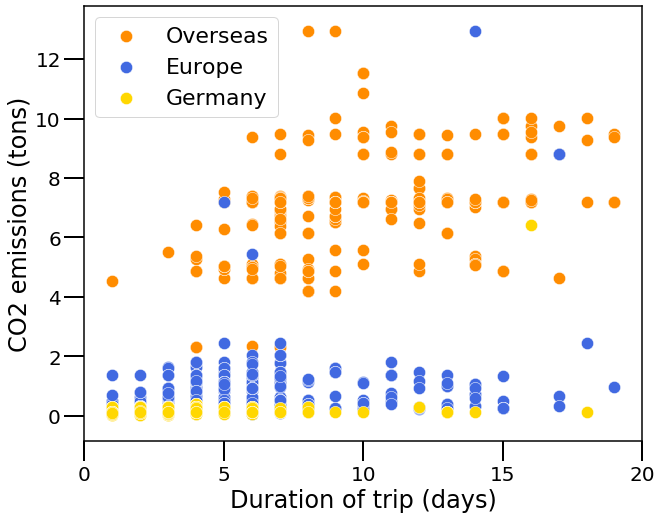

In [171]:
#### CO2 emissions as a function of duration of trips
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 1.5
ms = 150
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(x.Reisedauer[np.where(x.Reislaenge=='Overseas')[0]],two_ways[np.where(x.Reislaenge=='Overseas')[0]],\
            s=ms,edgecolor='white',lw=.5,color='darkorange',label='Overseas')
plt.scatter(x.Reisedauer[np.where(x.Reislaenge=='Europe')[0]],two_ways[np.where(x.Reislaenge=='Europe')[0]],\
            s=ms,edgecolor='white',lw=.5,color='royalblue',label='Europe')
plt.scatter(x.Reisedauer[np.where(x.Reislaenge=='Germany')[0]],two_ways[np.where(x.Reislaenge=='Germany')[0]],\
            s=ms,edgecolor='white',lw=.5,color='gold',label='Germany')

plt.xlim([0,20])
plt.xlabel('Duration of trip (days)',fontsize=24)
plt.ylabel('CO2 emissions (tons)',fontsize=24)
plt.xticks([0,5,10,15,20])
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
plt.legend(loc=0,fontsize=22)
plt.show()

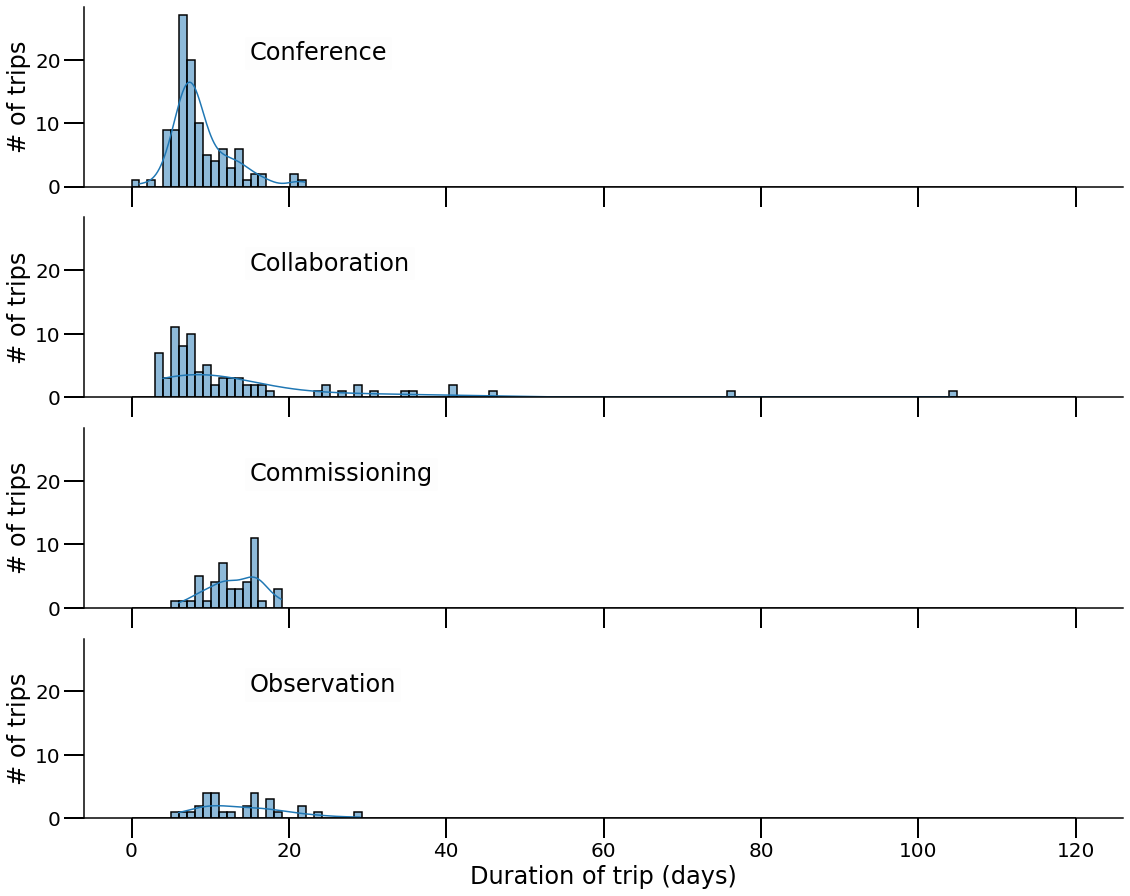

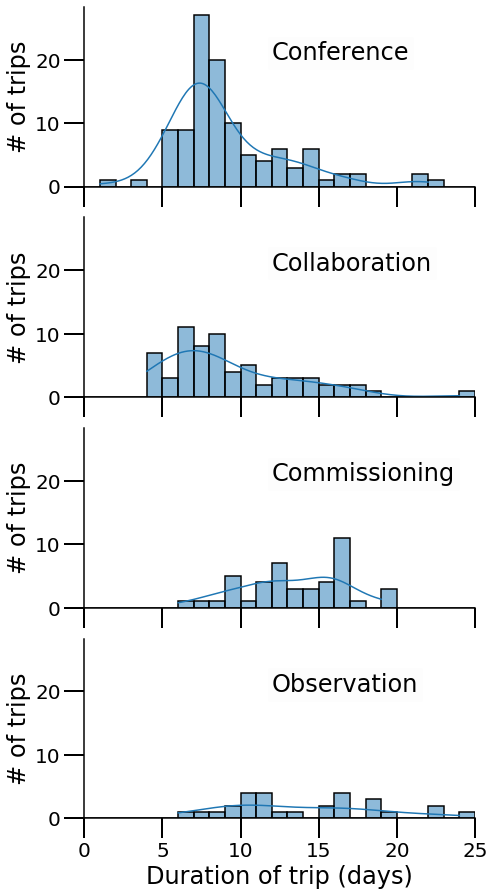

In [167]:
#### histogram of duration of trip by trip reason
#### from 0,120 days and a zoomed one from 0,25 days

# https://cduvallet.github.io/posts/2018/11/facetgrid-ylabel-access
# https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
g = sns.FacetGrid(x_emissionsgt2_pd,  row="Reisezweck", sharex=True,despine=True,\
                  row_order=['Conference','Collaboration','Comissioning','Observation'],\
                 aspect=5,legend_out=False,margin_titles = False)
g.map_dataframe(sns.histplot, bins=np.linspace(0,120,120),x="Reisedauer",kde=True,lw=1.5,legend=False)
plt.xlabel('Duration of trip (days)',fontsize=24)
# Iterate thorugh each axis
for ax,title in zip(g.axes.flat,['Conference','Collaboration','Commissioning','Observation']):
    ax.set_title('', fontsize=24)
    ax.text(15,20,title,fontsize=24,bbox=dict(facecolor='whitesmoke', edgecolor='white', alpha=0.2))
    ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
    ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
    ax.set_ylabel('# of trips',fontsize=24)

plt.show()


yy = x_emissionsgt2_pd.loc[x_emissionsgt2_pd['Reisedauer'] <25]
g = sns.FacetGrid(yy,  row="Reisezweck", sharex=True,despine=True,\
                  row_order=['Conference','Collaboration','Comissioning','Observation'],\
                 aspect=2,legend_out=False,margin_titles = False)
g.map_dataframe(sns.histplot, bins=np.linspace(0,25,26),x="Reisedauer",kde=True,lw=1.5,legend=False)
#                kde_kws=dict(linewidth=1.5))
# plt.xlim([0,20])
plt.xlabel('Duration of trip (days)',fontsize=24)


# Iterate thorugh each axis
for ax,title in zip(g.axes.flat,['Conference','Collaboration','Commissioning','Observation']):
    ax.set_title('', fontsize=24)
    ax.text(12,20,title,fontsize=24,bbox=dict(facecolor='whitesmoke', edgecolor='white', alpha=0.2))
    ax.set_xticks([0,5,10,15,20,25])
    ax.set_xlim([0,25])
    ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
    ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
    ax.set_ylabel('# of trips',fontsize=24)

plt.show()

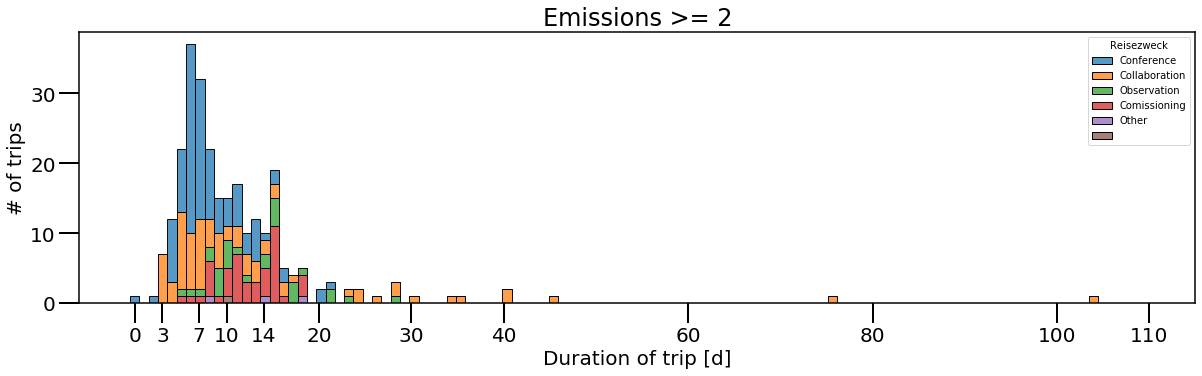

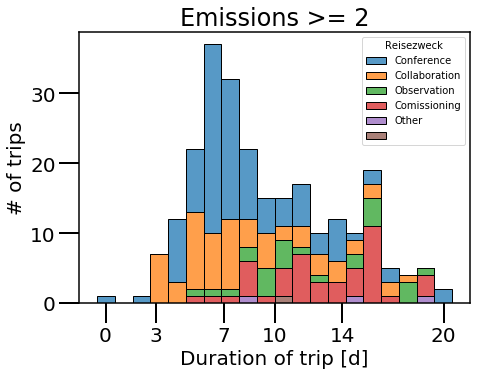

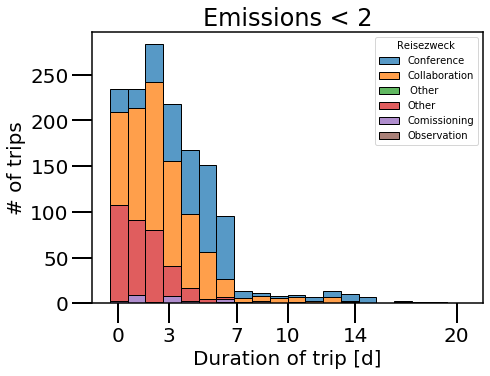

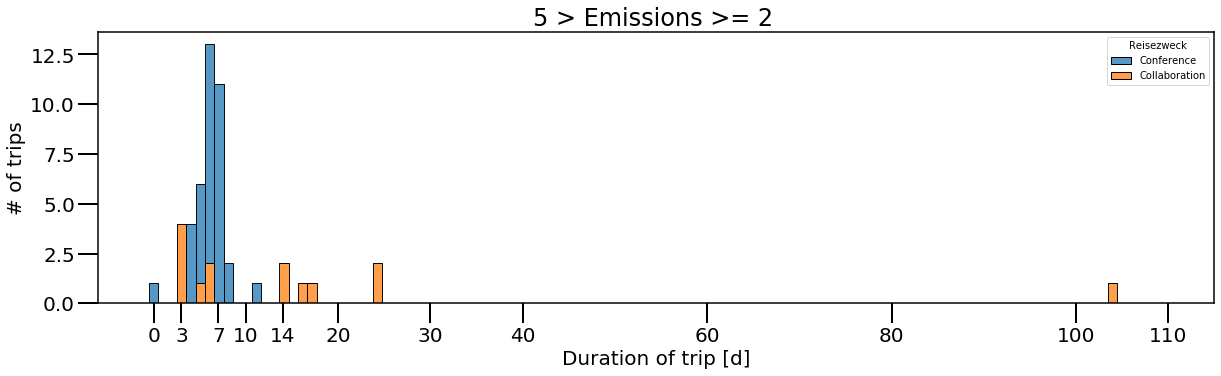

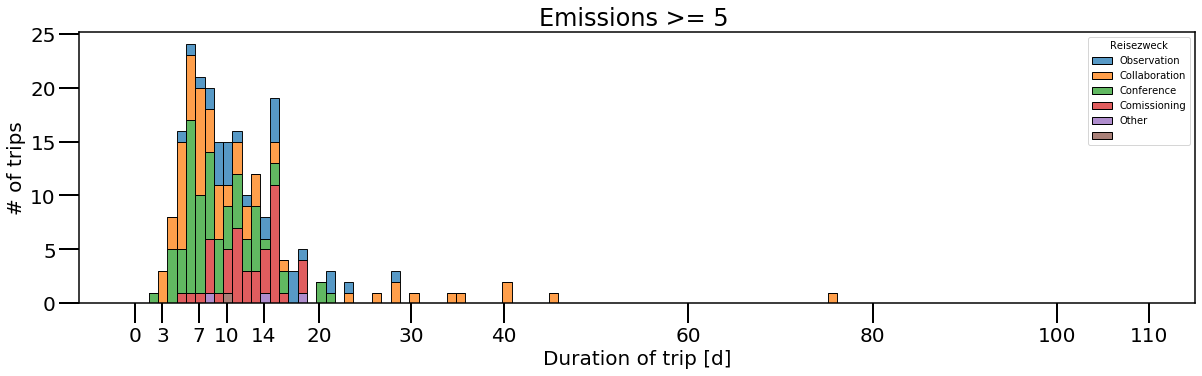

KeyError: 0

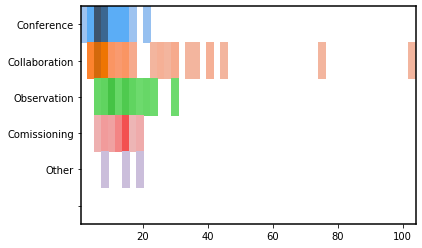

In [73]:
##### IGNORE IGNORE IGNORE
f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=x_emissionsgt2_pd, x='Reisedauer',multiple='stack',hue='Reisezweck',\
             bins=np.linspace(0,110,110),\
             color=['cornflowerblue', 'darkorange','mediumpurple','lightgreen','teal','blue'],\
             legend=True)
plt.title('Emissions >= 2',fontsize=24)
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_xlabel('Duration of trip [d]',fontsize=20)
ax.set_ylabel('# of trips',fontsize=20)
# ax.legend(fontsize=30)
ax.set_xticks([i+0.5 for i in [0,3,7,10,14,20,30,40,60,80,100,110]])
ax.set_xticklabels([str(i) for i in [0,3,7,10,14,20,30,40,60,80,100,110]])
plt.show()

f, ax = plt.subplots(figsize=(7,5))
sns.histplot(data=x_emissionsgt2_pd, x='Reisedauer',multiple='stack',hue='Reisezweck',\
             bins=np.linspace(0,21,21),\
             color=['cornflowerblue', 'darkorange','mediumpurple','lightgreen','teal','blue'],\
             legend=True)
plt.title('Emissions >= 2',fontsize=24)
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_xlabel('Duration of trip [d]',fontsize=20)
ax.set_ylabel('# of trips',fontsize=20)
# ax.legend(fontsize=30)
ax.set_xticks([i+0.5 for i in [0,3,7,10,14,20]])
ax.set_xticklabels([str(i) for i in [0,3,7,10,14,20]])
plt.show()

emissionslt2 = np.where(two_ways<2)[0]
x_emissionslt2 = x[emissionslt2]
x_emissionslt2_pd = pd.DataFrame(x_emissionslt2)

f, ax = plt.subplots(figsize=(7,5))
sns.histplot(data=x_emissionslt2_pd, x='Reisedauer',multiple='stack',hue='Reisezweck',\
             bins=np.linspace(0,21,21),\
             color=['cornflowerblue', 'darkorange','mediumpurple','lightgreen','teal','blue'],\
             legend=True)
plt.title('Emissions < 2',fontsize=24)
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_xlabel('Duration of trip [d]',fontsize=20)
ax.set_ylabel('# of trips',fontsize=20)
# ax.legend(fontsize=30)
ax.set_xticks([i+0.5 for i in [0,3,7,10,14,20]])
ax.set_xticklabels([str(i) for i in [0,3,7,10,14,20]])
plt.show()

emissionsgt2lt5 = np.where((two_ways>=2)&(two_ways<5))[0]
x_emissionsgt2lt5 = x[emissionsgt2lt5]
x_emissionsgt2lt5_pd = pd.DataFrame(x_emissionsgt2lt5)
f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=x_emissionsgt2lt5_pd, x='Reisedauer',multiple='stack',hue='Reisezweck',\
             bins=np.linspace(0,110,110),\
             color=['cornflowerblue', 'darkorange','mediumpurple','lightgreen','teal','blue'],\
             legend=True)
plt.title('5 > Emissions >= 2 ',fontsize=24)
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_xlabel('Duration of trip [d]',fontsize=20)
ax.set_ylabel('# of trips',fontsize=20)
# ax.legend(fontsize=30)
ax.set_xticks([i+0.5 for i in [0,3,7,10,14,20,30,40,60,80,100,110]])
ax.set_xticklabels([str(i) for i in [0,3,7,10,14,20,30,40,60,80,100,110]])
plt.show()

emissionsgt5 = np.where((two_ways>=5))[0]
x_emissionsgt5 = x[emissionsgt5]
x_emissionsgt5_pd = pd.DataFrame(x_emissionsgt5)
f, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=x_emissionsgt5_pd, x='Reisedauer',multiple='stack',hue='Reisezweck',\
             bins=np.linspace(0,110,110),\
             color=['cornflowerblue', 'darkorange','mediumpurple','lightgreen','teal','blue'],\
             legend=True)
plt.title('Emissions >= 5 ',fontsize=24)
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_xlabel('Duration of trip [d]',fontsize=20)
ax.set_ylabel('# of trips',fontsize=20)
# ax.legend(fontsize=30)
ax.set_xticks([i+0.5 for i in [0,3,7,10,14,20,30,40,60,80,100,110]])
ax.set_xticklabels([str(i) for i in [0,3,7,10,14,20,30,40,60,80,100,110]])
plt.show()

sns.histplot(
    x_emissionsgt2_pd, x='Reisedauer',y='Reisezweck',hue='Reisezweck', legend=False
)
plt.show()


durations = np.arange(0,np.max(x.Reisedauer)+1)
print(x.Reisedauer)
print(durations)
f, ax = plt.subplots(figsize=(20, 5))
sns.despine(f)
sns.histplot(x.Reisedauer,
            bins=durations,
            color='darkgrey')
ax.tick_params(axis='y', direction='out',length=20,width=2,labelsize=20)
ax.tick_params(axis='x', direction='out',length=20,width=2,labelsize=20)
ax.set_xticks([i+0.5 for i in [0,7,10,14,20,30,40,50,60,70,80,90,100,110]])
ax.set_xticklabels([str(i) for i in [0,7,10,14,20,30,40,50,60,70,80,90,100,110]])
ax.set_xlabel('Duration of trip [d]',fontsize=20)
ax.set_ylabel('# of trips',fontsize=20)
